In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#import tensorflow


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras import utils

In [3]:
df1 = pd.read_csv("Real_model2_exposure.csv")
df2 = pd.read_csv("Fake_model2_exposure.csv")
print(df1.head(),"\n",df2.head())
df1.shape

   Unnamed: 0         0         1         2         3         4         5  \
0           0  0.000225  0.002789  0.007053  0.013165  0.023256  0.032200   
1           1  0.287129  0.258197  0.152778  0.134534  0.107899  0.102985   
2           2  0.084317  0.000000  0.000000  0.093750  0.157895  0.186916   
3           3  0.084317  0.000000  0.090909  0.000000  0.069767  0.102041   
4           4  0.084317  0.064034  0.142857  0.000000  0.023256  0.042373   

          6         7         8  ...        246        247        248  \
0  0.067667  0.160588  0.298530  ...  43.397727  44.365662  45.341429   
1  0.120957  0.140873  0.186694  ...  40.500000  42.600000  47.000000   
2  0.142105  0.203704  0.225225  ...  43.190615  44.114840  44.927385   
3  0.123288  0.171521  0.235421  ...  43.190615  44.114840  44.927385   
4  0.111765  0.174658  0.208955  ...  43.111111  43.642857  44.000000   

         249        250        251        252        253        254        255  
0  46.443503  47.

(100, 257)

In [4]:
df1.drop(df1.columns[0], axis=1, inplace=True)
df2.drop(df2.columns[0], axis=1, inplace=True)
df1

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000225,0.002789,0.007053,0.013165,0.023256,0.032200,0.067667,0.160588,0.298530,0.477863,...,43.397727,44.365662,45.341429,46.443503,47.622999,48.997033,50.329582,52.011542,54.036745,56.117466
1,0.287129,0.258197,0.152778,0.134534,0.107899,0.102985,0.120957,0.140873,0.186694,0.238004,...,40.500000,42.600000,47.000000,48.500000,47.500000,48.750000,50.000000,52.500000,45.750000,50.681818
2,0.084317,0.000000,0.000000,0.093750,0.157895,0.186916,0.142105,0.203704,0.225225,0.326633,...,43.190615,44.114840,44.927385,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259
3,0.084317,0.000000,0.090909,0.000000,0.069767,0.102041,0.123288,0.171521,0.235421,0.266559,...,43.190615,44.114840,44.927385,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259
4,0.084317,0.064034,0.142857,0.000000,0.023256,0.042373,0.111765,0.174658,0.208955,0.271624,...,43.111111,43.642857,44.000000,45.400000,48.000000,48.500000,50.250654,51.399380,52.774901,54.710259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.084317,0.064034,0.057962,0.051730,0.065089,0.800000,0.285714,0.153846,0.107143,0.149083,...,43.190615,44.114840,44.927385,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259
96,0.084317,0.000000,0.057962,0.000000,0.000000,0.000000,0.066667,0.136986,0.139535,0.138629,...,42.000000,44.114840,44.927385,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259
97,0.084317,0.000000,0.000000,0.000000,0.004739,0.016746,0.055351,0.069264,0.136646,0.197619,...,43.068182,43.823529,45.116279,46.409091,47.589552,48.770370,50.066390,51.568807,53.114286,55.166667
98,0.084317,0.064034,0.057962,0.000000,0.000000,0.048077,0.028986,0.051095,0.095000,0.125348,...,43.190615,44.114840,45.000000,46.212162,47.315945,48.473492,50.250654,51.399380,52.774901,54.710259


In [9]:
mean_real = []
mean_fake = []
for col in df1.columns:
    mean_real.append(df1[col].mean())
    mean_fake.append(df2[col].mean())
    df1[col] = df1[col].replace(np.NaN, mean_real[-1])
    df2[col] = df2[col].replace(np.NaN, mean_fake[-1])

In [10]:
realX = np.array(df1)
fakeX = np.array(df2)
print(realX.shape, fakeX.shape)

np.random.shuffle(realX)
np.random.shuffle(fakeX)

(100, 256) (76, 256)


In [7]:
# real_size = int(0.80 * len(realX))
# fake_size = int(0.80 * len(fakeX))
# print(realX.shape, fakeX.shape)

# X_train = np.concatenate((realX[:real_size], fakeX[:fake_size]), axis=0)
# X_test = np.concatenate((realX[real_size:], fakeX[fake_size:]), axis=0)

# Y_train = np.array([1]*real_size + [0]*fake_size)
# Y_test = np.array([1]*(len(realX)-real_size) + [0]*(len(fakeX)-fake_size))

# print(X_train.shape, Y_train.shape, "\n", X_test.shape, Y_test.shape, "\n", Y_train, "\n", Y_test)

(28, 256) (94, 256)
(97, 256) (97,) 
 (25, 256) (25,) 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# print(X_train.shape, X_test.shape)

(97, 1, 256) (25, 1, 256)


In [10]:
#print(X_train[0][0])
# X_train = utils.normalize(X_train, axis=2)
# X_test = utils.normalize(X_test, axis=2)
#print(X_train[0][0])

In [11]:
X = np.concatenate((realX,fakeX), axis=0)
Y = np.array([1]*len(realX) + [0]*len(fakeX))

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(X, Y, validation_split=0.2, epochs=2500, shuffle=True)

Epoch 1/2500
5/5 [==============================] - 0s 74ms/step - loss: 0.9960 - accuracy: 0.7143 - val_loss: 1.9520 - val_accuracy: 0.0000e+00
Epoch 2/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.7143 - val_loss: 1.3361 - val_accuracy: 0.0000e+00
Epoch 3/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.3851 - accuracy: 0.7143 - val_loss: 0.9521 - val_accuracy: 0.0000e+00
Epoch 4/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.2642 - accuracy: 0.8286 - val_loss: 0.7704 - val_accuracy: 0.6944
Epoch 5/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.2214 - accuracy: 0.9214 - val_loss: 0.7240 - val_accuracy: 0.7778
Epoch 6/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.2089 - accuracy: 0.9714 - val_loss: 0.7063 - val_accuracy: 0.8611
Epoch 7/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.9786 - val_loss: 0.6989 - val_accuracy: 0.9167
Epoch 8

Epoch 59/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 1.0000 - val_loss: 0.5740 - val_accuracy: 0.9722
Epoch 60/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.1628 - accuracy: 1.0000 - val_loss: 0.5721 - val_accuracy: 0.9722
Epoch 61/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1622 - accuracy: 1.0000 - val_loss: 0.5701 - val_accuracy: 0.9722
Epoch 62/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1617 - accuracy: 1.0000 - val_loss: 0.5681 - val_accuracy: 0.9722
Epoch 63/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1611 - accuracy: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.9722
Epoch 64/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1606 - accuracy: 1.0000 - val_loss: 0.5645 - val_accuracy: 0.9722
Epoch 65/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1600 - accuracy: 1.0000 - val_loss: 0.5626 - val_accuracy: 0.9722
Epoch 66/2500

Epoch 117/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 1.0000 - val_loss: 0.4718 - val_accuracy: 0.9722
Epoch 118/2500
5/5 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 1.00 - 0s 5ms/step - loss: 0.1331 - accuracy: 1.0000 - val_loss: 0.4703 - val_accuracy: 0.9722
Epoch 119/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1327 - accuracy: 1.0000 - val_loss: 0.4687 - val_accuracy: 0.9722
Epoch 120/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1322 - accuracy: 1.0000 - val_loss: 0.4673 - val_accuracy: 0.9722
Epoch 121/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1318 - accuracy: 1.0000 - val_loss: 0.4658 - val_accuracy: 0.9722
Epoch 122/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 1.0000 - val_loss: 0.4643 - val_accuracy: 1.0000
Epoch 123/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1309 - accuracy: 1.0000 - val_

5/5 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 1.0000 - val_loss: 0.3912 - val_accuracy: 1.0000
Epoch 175/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1101 - accuracy: 1.0000 - val_loss: 0.3901 - val_accuracy: 1.0000
Epoch 176/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1097 - accuracy: 1.0000 - val_loss: 0.3889 - val_accuracy: 1.0000
Epoch 177/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1094 - accuracy: 1.0000 - val_loss: 0.3877 - val_accuracy: 1.0000
Epoch 178/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1091 - accuracy: 1.0000 - val_loss: 0.3865 - val_accuracy: 1.0000
Epoch 179/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1087 - accuracy: 1.0000 - val_loss: 0.3852 - val_accuracy: 1.0000
Epoch 180/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.1084 - accuracy: 1.0000 - val_loss: 0.3840 - val_accuracy: 1.0000
Epoch 181/2500
5/5 [=

Epoch 232/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0919 - accuracy: 1.0000 - val_loss: 0.3264 - val_accuracy: 1.0000
Epoch 233/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0916 - accuracy: 1.0000 - val_loss: 0.3253 - val_accuracy: 1.0000
Epoch 234/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0913 - accuracy: 1.0000 - val_loss: 0.3243 - val_accuracy: 1.0000
Epoch 235/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 1.0000 - val_loss: 0.3233 - val_accuracy: 1.0000
Epoch 236/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 1.0000 - val_loss: 0.3224 - val_accuracy: 1.0000
Epoch 237/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0905 - accuracy: 1.0000 - val_loss: 0.3214 - val_accuracy: 1.0000
Epoch 238/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0902 - accuracy: 1.0000 - val_loss: 0.3204 - val_accuracy: 1.0000
Epoch 

Epoch 290/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0769 - accuracy: 1.0000 - val_loss: 0.2739 - val_accuracy: 1.0000
Epoch 291/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 0.2731 - val_accuracy: 1.0000
Epoch 292/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 1.0000 - val_loss: 0.2723 - val_accuracy: 1.0000
Epoch 293/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0762 - accuracy: 1.0000 - val_loss: 0.2715 - val_accuracy: 1.0000
Epoch 294/2500
5/5 [==============================] - 0s 6ms/step - loss: 0.0760 - accuracy: 1.0000 - val_loss: 0.2707 - val_accuracy: 1.0000
Epoch 295/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0757 - accuracy: 1.0000 - val_loss: 0.2699 - val_accuracy: 1.0000
Epoch 296/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0755 - accuracy: 1.0000 - val_loss: 0.2691 - val_accuracy: 1.0000
Epoch 

Epoch 348/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 1.0000 - val_loss: 0.2311 - val_accuracy: 1.0000
Epoch 349/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0645 - accuracy: 1.0000 - val_loss: 0.2304 - val_accuracy: 1.0000
Epoch 350/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0643 - accuracy: 1.0000 - val_loss: 0.2298 - val_accuracy: 1.0000
Epoch 351/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0642 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 1.0000
Epoch 352/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0640 - accuracy: 1.0000 - val_loss: 0.2285 - val_accuracy: 1.0000
Epoch 353/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0638 - accuracy: 1.0000 - val_loss: 0.2279 - val_accuracy: 1.0000
Epoch 354/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0636 - accuracy: 1.0000 - val_loss: 0.2273 - val_accuracy: 1.0000
Epoch 

Epoch 406/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 1.0000
Epoch 407/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 0.1954 - val_accuracy: 1.0000
Epoch 408/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.1948 - val_accuracy: 1.0000
Epoch 409/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 1.0000 - val_loss: 0.1942 - val_accuracy: 1.0000
Epoch 410/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 0.1937 - val_accuracy: 1.0000
Epoch 411/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 0.1932 - val_accuracy: 1.0000
Epoch 412/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 0.1927 - val_accuracy: 1.0000
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 0.1675 - val_accuracy: 1.0000
Epoch 464/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 0.1671 - val_accuracy: 1.0000
Epoch 465/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 1.0000 - val_loss: 0.1666 - val_accuracy: 1.0000
Epoch 466/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 1.0000
Epoch 467/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0463 - accuracy: 1.0000 - val_loss: 0.1657 - val_accuracy: 1.0000
Epoch 468/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0462 - accuracy: 1.0000 - val_loss: 0.1652 - val_accuracy: 1.0000
Epoch 469/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.1648 - val_accuracy: 1.0000
Epoch 470/2500
5/5 [=

Epoch 521/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 1.0000
Epoch 522/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0400 - accuracy: 1.0000 - val_loss: 0.1436 - val_accuracy: 1.0000
Epoch 523/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 0.1432 - val_accuracy: 1.0000
Epoch 524/2500
5/5 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.1428 - val_accuracy: 1.0000
Epoch 525/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 1.0000
Epoch 526/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 0.1422 - val_accuracy: 1.0000
Epoch 527/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 1.0000
Epoch 

Epoch 579/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.1236 - val_accuracy: 1.0000
Epoch 580/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy: 1.0000
Epoch 581/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.1230 - val_accuracy: 1.0000
Epoch 582/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.1227 - val_accuracy: 1.0000
Epoch 583/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy: 1.0000
Epoch 584/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.1221 - val_accuracy: 1.0000
Epoch 585/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 1.0000
Epoch 

Epoch 637/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 1.0000
Epoch 638/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.1070 - val_accuracy: 1.0000
Epoch 639/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 1.0000
Epoch 640/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.1065 - val_accuracy: 1.0000
Epoch 641/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.1063 - val_accuracy: 1.0000
Epoch 642/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 1.0000
Epoch 643/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.1057 - val_accuracy: 1.0000
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0933 - val_accuracy: 1.0000
Epoch 695/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 1.0000
Epoch 696/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 1.0000
Epoch 697/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 1.0000
Epoch 698/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 1.0000
Epoch 699/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 1.0000
Epoch 700/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 1.0000
Epoch 701/2500
5/5 [=

Epoch 752/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0812 - val_accuracy: 1.0000
Epoch 753/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0810 - val_accuracy: 1.0000
Epoch 754/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy: 1.0000
Epoch 755/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 1.0000
Epoch 756/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 1.0000
Epoch 757/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 1.0000
Epoch 758/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 1.0000
Epoch 

Epoch 810/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.0710 - val_accuracy: 1.0000
Epoch 811/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.0708 - val_accuracy: 1.0000
Epoch 812/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 1.0000
Epoch 813/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 1.0000
Epoch 814/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 1.0000
Epoch 815/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 1.0000
Epoch 816/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 1.0000
Epoch 

Epoch 868/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 869/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 1.0000
Epoch 870/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0616 - val_accuracy: 1.0000
Epoch 871/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 1.0000
Epoch 872/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 873/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 1.0000
Epoch 874/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 1.0000
Epoch 

Epoch 926/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 1.0000
Epoch 927/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 1.0000
Epoch 928/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 1.0000
Epoch 929/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 930/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 931/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 932/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 

Epoch 984/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 985/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 986/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 987/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 988/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 989/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 990/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 1.0000
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 1042/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 1043/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 1044/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 1045/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 1.0000
Epoch 1046/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 1047/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 1048/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 1099/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 1100/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 1101/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 1102/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 1103/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 1104/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 1.0000
Epoch 1105/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 1156/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 1157/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 1158/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 1159/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 1160/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 1161/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 1162/2500

5/5 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 1213/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 1214/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 1215/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 1216/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 1217/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 1218/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 1219/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 1270/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 1271/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 1272/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 1273/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 1274/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 1275/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 1276/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 1327/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 1328/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 1329/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 1330/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 1331/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 1332/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 1333/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 1384/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 1385/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 1386/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 1387/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 1388/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 1389/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 1390/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 1441/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 1442/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 1443/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 1444/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 1445/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 1446/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 1447/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 1498/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 1499/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 1500/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 1501/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 1502/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 1503/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 1504/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 1555/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 1556/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 1557/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 1558/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 1559/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 1560/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 1561/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 1612/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 1613/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 1614/2500
5/5 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 1615/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 1616/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 1617/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0

Epoch 1668/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 1669/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 1670/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 1671/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 1672/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 1673/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 1674/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000

5/5 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 1726/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 1727/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 1728/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 1729/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 1730/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 1731/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 1732/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 1783/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 1784/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 1785/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 1786/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 1787/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 1788/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 1789/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 1840/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 1841/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 1842/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 1843/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 1844/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 1845/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 1846/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 1897/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 1898/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 1899/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 1900/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 1901/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 1902/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 1903/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1954/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1955/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1956/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1957/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 1958/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 1959/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 1960/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 2011/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 2012/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 2013/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 2014/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 2015/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 2016/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 2017/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2068/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2069/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2070/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2071/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2072/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2073/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2074/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2125/2500
5/5 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2126/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2127/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2128/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2129/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2130/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2131/2500

5/5 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 2182/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 2183/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 2184/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 2185/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 2186/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 2187/2500
5/5 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 2188/2500

5/5 [==============================] - 0s 3ms/step - loss: 9.2726e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2238/2500
5/5 [==============================] - 0s 3ms/step - loss: 9.2531e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2239/2500
5/5 [==============================] - 0s 3ms/step - loss: 9.2336e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2240/2500
5/5 [==============================] - 0s 3ms/step - loss: 9.2146e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2241/2500
5/5 [==============================] - 0s 3ms/step - loss: 9.1954e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2242/2500
5/5 [==============================] - 0s 3ms/step - loss: 9.1768e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2243/2500
5/5 [==============================] - 0s 3ms/step - loss: 9.1570e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accu

Epoch 2293/2500
5/5 [==============================] - 0s 3ms/step - loss: 8.2580e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2294/2500
5/5 [==============================] - 0s 3ms/step - loss: 8.2399e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2295/2500
5/5 [==============================] - 0s 3ms/step - loss: 8.2235e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2296/2500
5/5 [==============================] - 0s 3ms/step - loss: 8.2049e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2297/2500
5/5 [==============================] - 0s 3ms/step - loss: 8.1890e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2298/2500
5/5 [==============================] - 0s 3ms/step - loss: 8.1721e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2299/2500
5/5 [==============================] - 0s 3ms/step - loss: 8.1552e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 2349/2500
5/5 [==============================] - 0s 3ms/step - loss: 7.3533e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2350/2500
5/5 [==============================] - 0s 3ms/step - loss: 7.3369e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2351/2500
5/5 [==============================] - 0s 3ms/step - loss: 7.3213e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2352/2500
5/5 [==============================] - 0s 3ms/step - loss: 7.3061e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2353/2500
5/5 [==============================] - 0s 3ms/step - loss: 7.2905e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2354/2500
5/5 [==============================] - 0s 3ms/step - loss: 7.2736e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2355/2500
5/5 [==============================] - 0s 3ms/step - loss: 7.2592e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 2405/2500
5/5 [==============================] - 0s 3ms/step - loss: 6.5541e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2406/2500
5/5 [==============================] - 0s 3ms/step - loss: 6.5399e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2407/2500
5/5 [==============================] - 0s 3ms/step - loss: 6.5275e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2408/2500
5/5 [==============================] - 0s 3ms/step - loss: 6.5140e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2409/2500
5/5 [==============================] - 0s 3ms/step - loss: 6.5003e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2410/2500
5/5 [==============================] - 0s 3ms/step - loss: 6.4878e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2411/2500
5/5 [==============================] - 0s 3ms/step - loss: 6.4741e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 2461/2500
5/5 [==============================] - 0s 3ms/step - loss: 5.8443e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2462/2500
5/5 [==============================] - 0s 3ms/step - loss: 5.8327e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2463/2500
5/5 [==============================] - 0s 3ms/step - loss: 5.8214e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2464/2500
5/5 [==============================] - 0s 3ms/step - loss: 5.8096e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2465/2500
5/5 [==============================] - 0s 3ms/step - loss: 5.7972e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2466/2500
5/5 [==============================] - 0s 3ms/step - loss: 5.7850e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2467/2500
5/5 [==============================] - 0s 3ms/step - loss: 5.7730e-04 - accuracy: 1.0000 - val_loss: 0

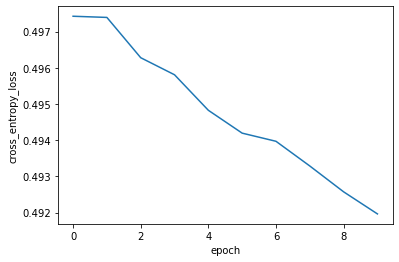

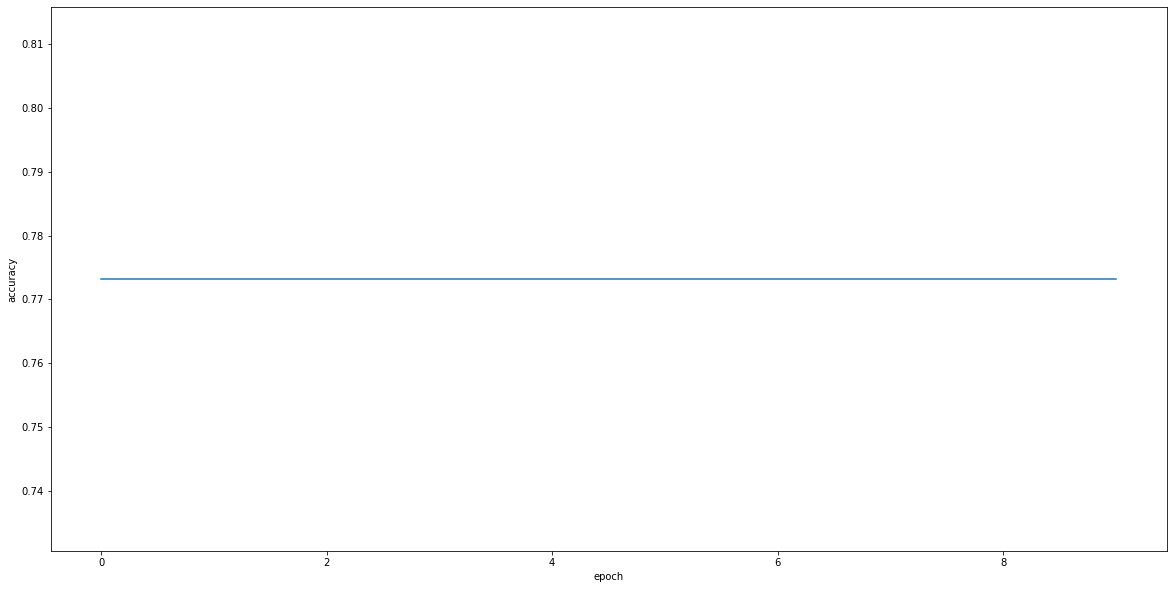

In [37]:
# plt.plot(history.history["loss"])
# plt.xlabel("epoch")
# plt.ylabel("cross_entropy_loss")
# plt.show()

# fig = plt.figure(figsize=(20,10))
# plt.plot(history.history["accuracy"])
# plt.xlabel("epoch")
# plt.ylabel("accuracy")
# plt.show()


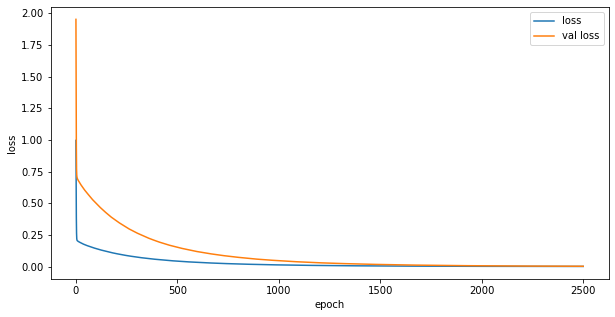

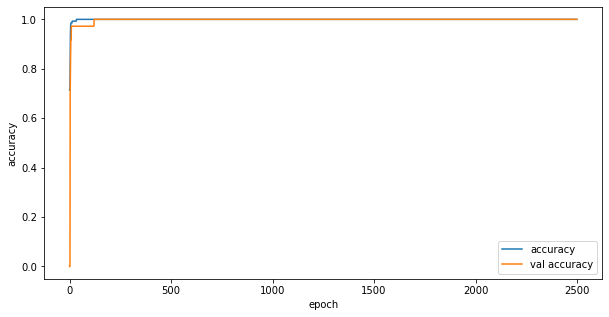

In [22]:
figure = plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

figure = plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label='accuracy')
plt.plot(history.history["val_accuracy"], label='val accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [38]:
# val_loss, val_accuracy = model.evaluate(X_test, Y_test)
# print(val_loss, val_accuracy)

1/1 [==============================] - 0s 8ms/step - loss: 0.5150 - accuracy: 0.7600
0.5149695873260498 0.7599999904632568


In [25]:
df3 = pd.read_csv("TestReal_model2_exposure.csv")
df4 = pd.read_csv("TestFake_model2_exposure.csv")

df3.drop(df3.columns[0], axis=1, inplace=True)
df4.drop(df4.columns[0], axis=1, inplace=True)

# df3 = df3.fillna(0)
# df4 = df4.fillna(0)
# print(df3,"\n",df4)

for col in df3.columns:
    df3[col] = df3[col].replace(np.NaN, mean_real[int(col)])
    df4[col] = df4[col].replace(np.NaN, mean_fake[int(col)])


realX_test = np.array(df3)
fakeX_test = np.array(df4)
print(realX_test.shape, fakeX_test.shape)

# np.random.shuffle(realX_test)
# np.random.shuffle(fakeX_test)


(7, 256) (14, 256)


In [26]:
X_test = np.concatenate((realX_test,fakeX_test), axis=0)
Y_test = np.array([1]*len(realX_test) + [0]*len(fakeX_test))

X_test = scaler.transform(X_test)
print(X_test.shape, Y_test.shape)

(21, 256) (21,)


In [27]:
Y_test_pred = model.predict(X_test)
print(Y_test_pred)

[[1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.00188491]
 [0.00188491]
 [0.00188491]
 [0.00188491]
 [0.00188491]
 [0.43305027]
 [0.00188491]
 [0.00188491]
 [1.        ]
 [0.00188491]
 [0.00188491]
 [0.00188491]
 [0.00188491]
 [0.00188491]]


In [28]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 0s/step - loss: 3.6195 - accuracy: 0.9524


[3.6194980144500732, 0.9523809552192688]

In [31]:
model.save("single_hidden_layer_updated.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: single_hidden_layer_updated.model\assets
